

## Cyclistic bike-share
Desde sus inicios en 2016, Cyclistic bike-share es una empresa dedicada a ofrecer un servicio de alquiler de bicicletas en la ciudad de Chicago. Su crecimiento la llevó a contar con un total de 5.824 bicicletas con geolocalización y 692 estaciones distribuidas por la ciudad. Además, ofrece la comodidad de que las unidades pueden desbloquearse en una estación y devolverse en otra, en cualquier momento.
Entre los planes disponibles se encuentran dos: ocasionales y anuales. Los planes ocasionales incluyen viajes únicos o pases diarios, y quienes lo utilizan se considerados usuarios ocasionales. Por otro lado, los planes anuales abarcan viajes durante todo el año, y sus usuarios son denominados miembros.


### Desafíos
A raíz de estudios realizados por el sector financiero, se determinó que los usuarios miembros son más rentables que los usuarios ocasionales. Por este motivo, y con el fin de maximizar los ingresos, la compañía quiere implementar estrategias que impulsen un incremento en la cantidad de los usuarios miembros. 
Para ello, resulta esencial analizar cómo utilizan el servicio ambos grupos de usuarios y qué factores podrían influir en su decisión de convertirse en miembros.

### Enfoque especifico del proyecto
Como se mencionó anteriormente, el proyecto tiene como fin la obtención de información relevante para la toma de decisiones que impulsen el desarrollo de la compañía.
Para ello, se establecieron tres preguntas guía que permitirán definir las futuras estrategias de manera efectiva:

1.	¿De qué manera utilizan las bicicletas los usuarios miembros y los usuarios ocasionales?
2.	¿Por qué los usuarios ocasionales deberían adquirir una membresía anual?
3.	¿Cómo puede Cyclistic utilizar los medios digitales para influir en que los usuarios ocasionales se conviertan en miembros?

Este caso de estudio se centrará puntualmente en **la primera pregunta** del proyecto.





### BUSINESS TASK:
**ANALIZAR LAS DIFERENCIAS DE USO ENTRE USUARIOS CASUALES Y MIEMBROS ANUALES PARA DISEÑAR ESTRATEGIAS QUE AUMENTEN LA CONVERSIÓN DE USUARIOS CASUALES A MIEMBROS.**

## Herramientas y fuente de los datos
Para esta tarea se utilizó como herramienta principal RStudio para el análisis de los datos. Puesto que el universo de datos era demasiado extenso, se tomaron únicamente dos trimestres de distintos años. De esta forma, se obtiene una muestra significativa y se evidencia que la tendencia se mantiene a lo largo del tiempo. Cabe mencionar que los datos provienen de Motivate International Inc. bajo licencia pública y no contienen información personal identificable, lo que garantiza el cumplimiento de los requisitos de privacidad del caso.


## Composición de la Muestra
En este caso de estudio, se utilizó la información histórica correspondiente al primer trimestre de 2019 y el primer trimestre de 2020. Sin embargo, se notó que había viajes que superaban la duración de 24 horas. Al no poder determinarse si se trataban de errores o bien casos aislados, se decidió reducir la muestra de manera tal que solo se contemplen en el análisis viajes que se encuentren dentro de determinados parámetros. Si bien podrían existir viajes de mayor duración, se determinó como criterio para el análisis únicamente viajes que no superen las 12 horas.
A continuación, realizaremos una comparación entre la muestra original y la muestra reducida para demostrar que la reducción no significa un cambio que pueda afectar al estudio en cuestión. 


A continuación, se realizan las tareas pertinentes de importación, unificación y limpieza de datos: 

In [1]:
#Instala paquetes necesarios para trabajar
library(tidyverse)
library(lubridate)
library(ggplot2) 

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [2]:
#Importa archivos csv
Q1_2019 <- read_csv("/kaggle/input/datos-pblicos-de-motivate-international-inc/Divvy_Trips_2019_Q1 - Divvy_Trips_2019_Q1.csv")
Q1_2020 <- read_csv("/kaggle/input/datos-pblicos-de-motivate-international-inc/Divvy_Trips_2020_Q1 - Divvy_Trips_2020_Q1.csv")


Rows: 365069 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (6): start_time, end_time, from_station_name, to_station_name, usertype,...
dbl (5): trip_id, bikeid, from_station_id, to_station_id, birthyear
num (1): tripduration

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 426887 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): ride_id, rideable_type, started_at, ended_at, start_station_name, e...
dbl (6): start_station_id, end_station_id, start_lat, start_lng, end_lat, en...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [3]:
#Lista cuadros para control
head(Q1_2019)
head(Q1_2020)


trip_id,start_time,end_time,bikeid,tripduration,from_station_id,from_station_name,to_station_id,to_station_name,usertype,gender,birthyear
<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<dbl>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,2167,390,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,4386,441,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,1524,829,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,252,1783,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,1170,364,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,2437,216,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983


ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
EACB19130B0CDA4A,docked_bike,2020-01-21 20:06:59,2020-01-21 20:14:30,Western Ave & Leland Ave,239,Clark St & Leland Ave,326,41.9665,-87.6884,41.9671,-87.6674,member
8FED874C809DC021,docked_bike,2020-01-30 14:22:39,2020-01-30 14:26:22,Clark St & Montrose Ave,234,Southport Ave & Irving Park Rd,318,41.9616,-87.6660,41.9542,-87.6644,member
789F3C21E472CA96,docked_bike,2020-01-09 19:29:26,2020-01-09 19:32:17,Broadway & Belmont Ave,296,Wilton Ave & Belmont Ave,117,41.9401,-87.6455,41.9402,-87.6530,member
C9A388DAC6ABF313,docked_bike,2020-01-06 16:17:07,2020-01-06 16:25:56,Clark St & Randolph St,51,Fairbanks Ct & Grand Ave,24,41.8846,-87.6319,41.8918,-87.6206,member
943BC3CBECCFD662,docked_bike,2020-01-30 8:37:16,2020-01-30 8:42:48,Clinton St & Lake St,66,Wells St & Hubbard St,212,41.8856,-87.6418,41.8899,-87.6343,member
6D9C8A6938165C11,docked_bike,2020-01-10 12:33:05,2020-01-10 12:37:54,Wells St & Hubbard St,212,Desplaines St & Randolph St,96,41.8899,-87.6343,41.8846,-87.6446,member


In [4]:
#Estandariza nombres
Q1_2019 <- Q1_2019 %>% 
  rename(
    ride_id = trip_id,
    started_at = start_time,
    ended_at = end_time,
    start_station_id = from_station_id,
    start_station_name = from_station_name,
    end_station_id = to_station_id,
    end_station_name = to_station_name,
    member_casual = usertype
  ) 



In [5]:
#Selecciona columnas que se utilizaran para el analisis
Q1_2019v2 <- Q1_2019 %>% 
  select(ride_id, started_at , ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual )
Q1_2020v2 <- Q1_2020 %>% 
  select(ride_id, started_at , ended_at, start_station_id, start_station_name, end_station_id, end_station_name, member_casual )

In [6]:
#Unifica criterios
Q1_2019v2 <- Q1_2019v2 %>% mutate(ride_id = as.character(ride_id))
Q1_2020v2 <- Q1_2020v2 %>% mutate(ride_id = as.character(ride_id))



In [7]:
#Lista cuadros para control
head(Q1_2019v2)
head(Q1_2020v2)

ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
EACB19130B0CDA4A,2020-01-21 20:06:59,2020-01-21 20:14:30,239,Western Ave & Leland Ave,326,Clark St & Leland Ave,member
8FED874C809DC021,2020-01-30 14:22:39,2020-01-30 14:26:22,234,Clark St & Montrose Ave,318,Southport Ave & Irving Park Rd,member
789F3C21E472CA96,2020-01-09 19:29:26,2020-01-09 19:32:17,296,Broadway & Belmont Ave,117,Wilton Ave & Belmont Ave,member
C9A388DAC6ABF313,2020-01-06 16:17:07,2020-01-06 16:25:56,51,Clark St & Randolph St,24,Fairbanks Ct & Grand Ave,member
943BC3CBECCFD662,2020-01-30 8:37:16,2020-01-30 8:42:48,66,Clinton St & Lake St,212,Wells St & Hubbard St,member
6D9C8A6938165C11,2020-01-10 12:33:05,2020-01-10 12:37:54,212,Wells St & Hubbard St,96,Desplaines St & Randolph St,member


In [8]:
#Unifica tablas
all_trips <- bind_rows(Q1_2019v2, Q1_2020v2)


In [9]:
#Lista cuadro para control
head(all_trips)

ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


In [10]:
#Unifica criterios
all_trips <- all_trips %>%
  mutate(member_casual = recode(member_casual,
                                "Subscriber" = "member",
                                "Customer" = "casual")) #unifica criterio de clasificacion de clientes

In [11]:
#Lista cuadro para control
head(all_trips)

ride_id,started_at,ended_at,start_station_id,start_station_name,end_station_id,end_station_name,member_casual
<chr>,<chr>,<chr>,<dbl>,<chr>,<dbl>,<chr>,<chr>
21742443,2019-01-01 0:04:37,2019-01-01 0:11:07,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,member
21742444,2019-01-01 0:08:13,2019-01-01 0:15:34,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),member
21742445,2019-01-01 0:13:23,2019-01-01 0:27:12,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),member
21742446,2019-01-01 0:13:45,2019-01-01 0:43:28,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,member
21742447,2019-01-01 0:14:52,2019-01-01 0:20:56,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,member
21742448,2019-01-01 0:15:33,2019-01-01 0:19:09,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,member


In [12]:
#Crea tabla con el universo completo de datos 
all_tripscompleto <- all_trips %>% 
  mutate(
    started_at = ymd_hms(started_at),
    ended_at = ymd_hms(ended_at),
    ride_length = as.numeric(difftime(ended_at, started_at, units = "mins")),
    day_of_week = wday(started_at, label = TRUE)
  )

In [13]:
#Cuenta usuarios para grafico Nro 1
user_countscompletos <- all_tripscompleto %>%
  group_by(member_casual) %>%
  summarise(count = n()) %>%
  mutate(percent = count / sum(count) * 100,
         label = paste0(member_casual, " ", round(percent,1), "%"))



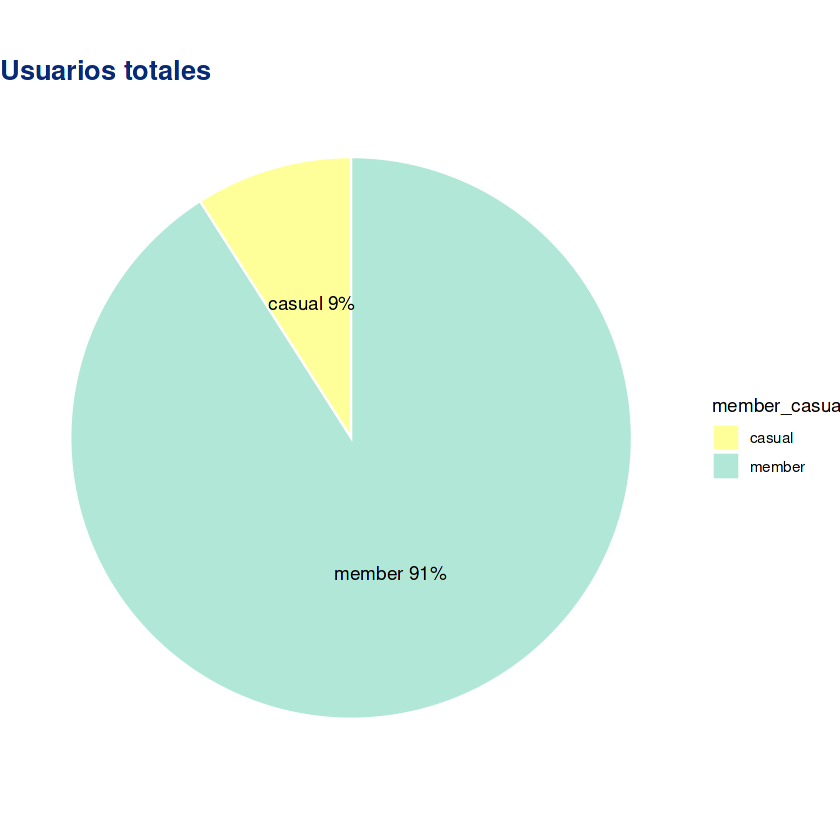

In [14]:
#Grafico 1: grafico de torta representativo de la muestra completa
ggplot(user_countscompletos, aes(x = "", y = percent, fill = member_casual)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(
      title = "Usuarios totales") +
  theme_void()+
  scale_fill_manual(
      values = c("member" = "#B1E7D6", "casual" = "#FFFF99"))+
  theme(
      plot.title = element_text(color = "#082A75", size = 16, face = "bold"))

In [15]:
#Crea nueva tabla depurada
all_trips <- all_trips %>% 
  mutate(
    started_at = ymd_hms(started_at),
    ended_at = ymd_hms(ended_at),
    ride_length = as.numeric(difftime(ended_at, started_at, units = "mins")),
    day_of_week = wday(started_at, label = TRUE)
  ) %>%
  filter(ride_length > 1 & ride_length < 720)  # Se reduce el estudio a viajes razonables, si el viaje dura menos de 1 min o mas de 12horas se tratan de posibles errores o casos aislados



In [16]:
#Incluye columna year a tabla all_trips
all_trips <- all_trips %>%
  mutate(year = year(started_at))

In [17]:
#Cuenta usuarios para grafico Nro 2
user_counts <- all_trips %>%
  group_by(member_casual) %>%
  summarise(count = n()) %>%
  mutate(percent = count / sum(count) * 100,
         label = paste0(member_casual, " ", round(percent,1), "%"))

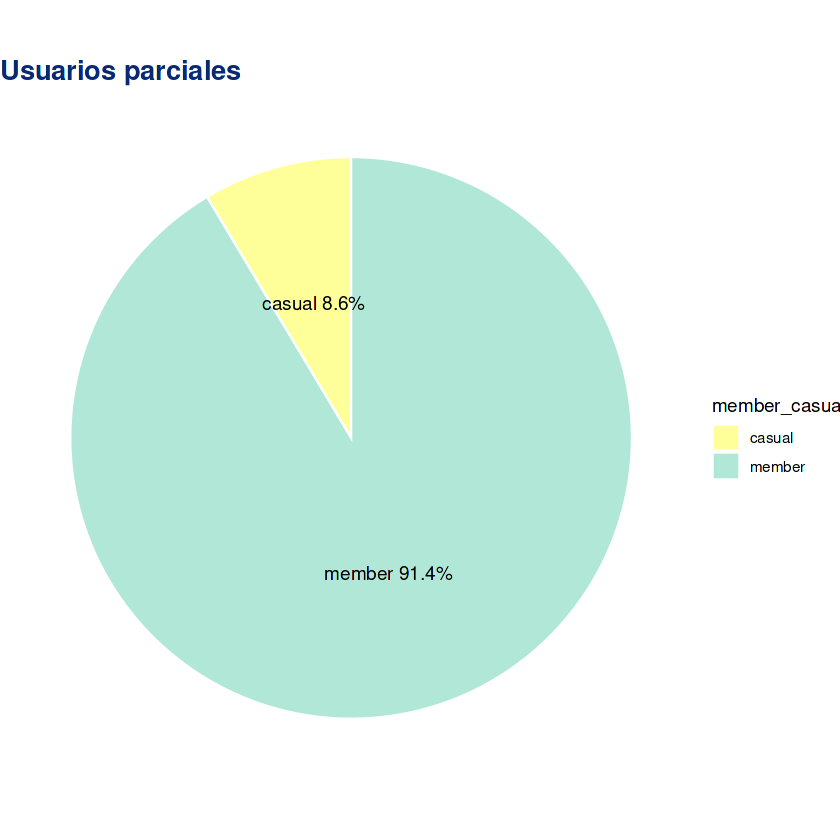

In [18]:
#Grafico 2: grafico de torta representativo de la muestra depurada
ggplot(user_counts, aes(x = "", y = percent, fill = member_casual)) +
  geom_col(width = 1, color = "white") +
  coord_polar(theta = "y") +
  geom_text(aes(label = label), position = position_stack(vjust = 0.5)) +
  labs(
      title = "Usuarios parciales") +
  theme_void()+
  scale_fill_manual(
      values = c("member" = "#B1E7D6", "casual" = "#FFFF99"))+
  theme(
      plot.title = element_text(color = "#082A75", size = 16, face = "bold"))


Como se visualiza en los gráficos de torta, a pesar de las modificaciones introducidas no se observaron cambios significativos en la muestra. La participación de los usuarios casuales varía en menos de 0,4 puntos porcentuales, mientras que los usuarios miembros aumentan en la misma proporción.  
Esto indica que el filtrado no introduce sesgos ni alteraciones en la muestra; por el contrario, la muestra es más representativa y consistente con el comportamiento global al eliminar valores extremos o poco usuales.
En conclusión, la limpieza de los datos mejora su calidad para el análisis.


## Comparativa de viajes entre usuarios
Para este estudio, la muestra final utilizada ascendió a un total de 783.363 viajes, de los cuales 67.171 corresponden a usuarios casuales y 716.192 a usuarios miembro, representando un 8.6% y 91.4% respectivamente. De estos datos se extrajo que el valor promedio y mediana para los usuarios casuales es de 35.1 minutos y 23.1 minutos, mientras que para los miembros es de 11.2 minutos y 8.5 minutos respectivamente como se puede visualizar en el siguiente gráfico.
Con respecto a los valores máximos en minutos por viaje, se visualizan cifras similares entre ambos grupos; sin embargo, estos valores podrían corresponder a casos atípicos, por lo que no pueden obtener observaciones definitivas.


In [19]:
#Promedio de duración por tipo de usuario
all_trips %>% 
  group_by(member_casual) %>%
  summarise(
    mean_ride = mean(ride_length),
    median_ride = median(ride_length),
    max_ride = max(ride_length),
    trips = n()
  )


member_casual,mean_ride,median_ride,max_ride,trips
<chr>,<dbl>,<dbl>,<dbl>,<int>
casual,35.05514,23.11667,716.3333,67171
member,11.19256,8.50000,716.7000,716192


In [20]:
#Resumen estadístico para grafico nro 3
summary_stats <- all_trips %>%
  group_by(member_casual) %>%
  summarise(
    mean_ride = mean(ride_length, na.rm = TRUE),
    median_ride = median(ride_length, na.rm = TRUE),
    max_ride = max(ride_length, na.rm = TRUE)
  ) %>%
  pivot_longer(cols = c(mean_ride, median_ride, max_ride),
               names_to = "statistic",
               values_to = "value")

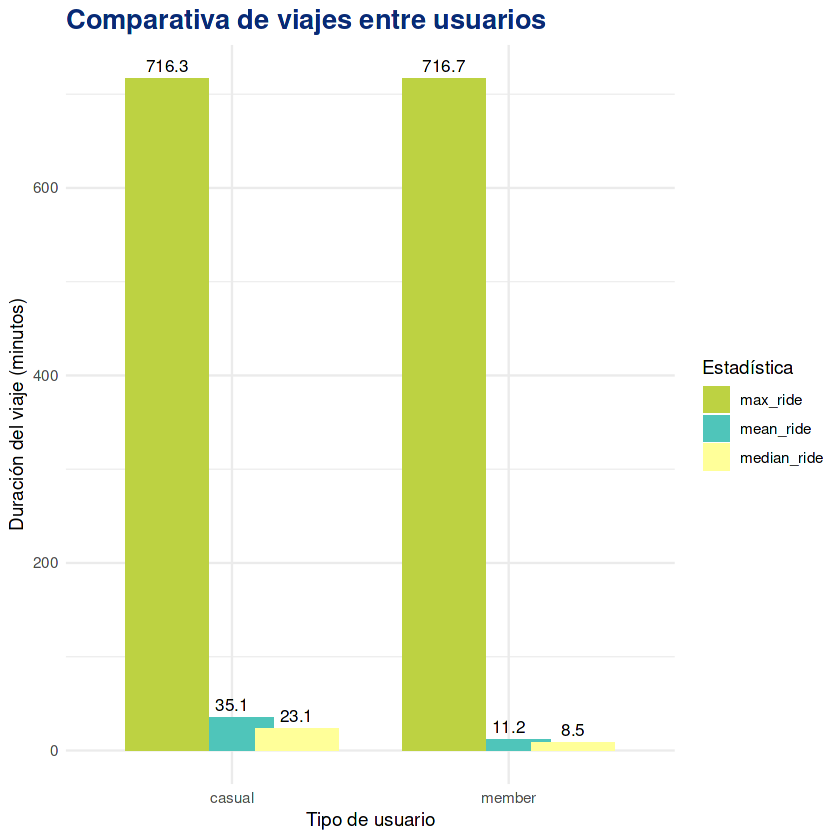

In [21]:
# Gráfico 3: 
ggplot(summary_stats, aes(x = member_casual, y = value, fill = statistic)) + #Grafico, de que tabla toma la info
  geom_bar(stat = "identity", position = position_dodge(width = 0.7)) +      #tipo de grafico - barras
  geom_text(aes(label = round(value, 1)),                                    #texto dentro del grafico
            position = position_dodge(width = 0.7), vjust = -0.5, size = 3.5) +
  labs(
    title = "Comparativa de viajes entre usuarios",
    x = "Tipo de usuario",
    y = "Duración del viaje (minutos)",
    fill = "Estadística"
  ) +
  theme_minimal()+theme(
    plot.title = element_text(color = "#082A75", size = 16, face = "bold"))+
  scale_fill_manual(values = c("max_ride" = "#BDD242", "mean_ride" = "#4FC5BA", "median_ride" = "#FFFF99")) 

De esta manera, se puede deducir que los usuarios miembros realizan más viajes, pero de menor duración, mientras que los casuales realizan menos cantidad de viajes, aunque significativamente más largos. Es probable, entonces, que los miembros utilicen el servicio para transportarse de manera cotidiana, como ir a trabajar o recorridos breves, mientras que los usuarios casuales utilizan el servicio en ocasiones esporádicas, vinculadas con actividades de ocio, turismo o paseos recreativos.

Esto se evidencia en el siguiente grafico de densidad:


In [22]:
#Filtra viajes mayores a 120 min para grafico Nro 4
all_trips_filtered <- all_trips %>% filter(ride_length <= 120)

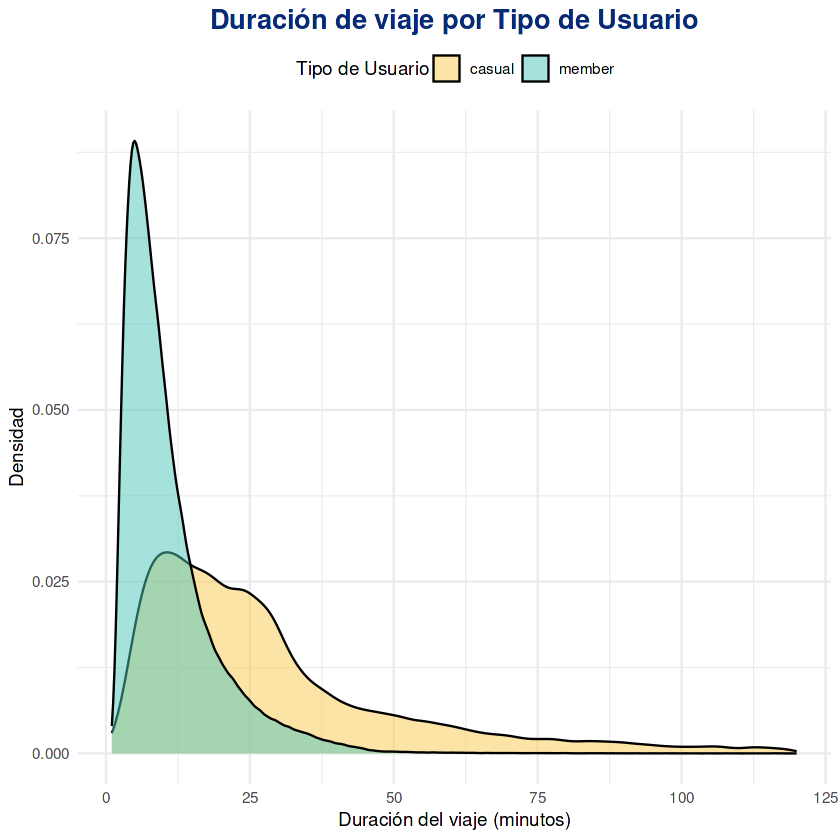

In [23]:
#Gráfico 4:Densidad por tipo de usuario
ggplot(all_trips_filtered, aes(x = ride_length, fill = member_casual)) +
  geom_density(alpha = 0.5) +
  labs(
      title = "Duración de viaje por Tipo de Usuario",
      x = "Duración del viaje (minutos)",
      y = "Densidad",
      fill = "Tipo de Usuario") +
  theme_minimal() +
  scale_fill_manual(
      values = c("casual" = "#F9C74F", "member" = "#4FC5BA")) +
  theme(
      legend.position = "top")+ 
  theme(
      plot.title = element_text(color = "#082A75",size = 16,face = "bold",hjust = 0.5))


## Patrón de viajes por día de la semana
Al observar el comportamiento de los miembros y los usuarios casuales, se pueden identificar diferencias significativas. Por un lado, si bien los miembros demandan el servicio todos los días, la demanda se centra en días de semana con un gran volumen de viajes que sugieren un uso funcional, probablemente vinculado con desplazamientos por actividades diarias. Por otro lado, los usuarios casuales emplean el servicio principalmente durante los fines de semana, lo que indicaría patrones vinculados al ocio o actividades recreativas.


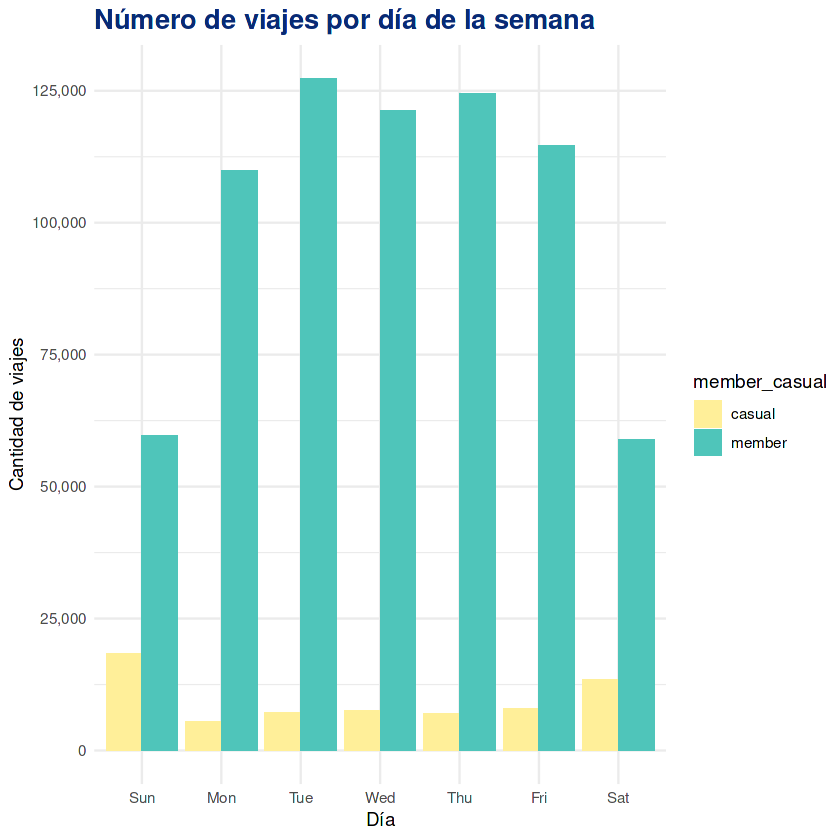

In [24]:
#Grafico 5: Nro de viajes por dia por usuario
ggplot(
    all_trips %>%
    group_by(member_casual, day_of_week) %>%
    summarise(num_trips=n(), .groups="drop"),aes(x=day_of_week, y=num_trips, fill=member_casual)) +
  geom_col(position="dodge") + 
  scale_y_continuous(
      labels = scales::comma,
      breaks = seq(0, 200000, 25000))+
  labs(
      title="Número de viajes por día de la semana", 
      x="Día", 
      y="Cantidad de viajes")+
  theme_minimal()+
  theme(
    plot.title = element_text(color = "#082A75", size = 16, face = "bold"))+
  scale_fill_manual(
      values = c( "casual" = "#FFeF99", "member" = "#4FC5BA")) 

## Distribución de viajes por hora del día
Al analizar las franjas horarias de demanda, se puede notar que los comportamientos difieren nuevamente entre los distintos usuarios, aunque siguiendo una misma tendencia. Reforzando la idea desarrollada anteriormente, donde se mencionó que el servicio es utilizado como medio de transporte regular y funcional, los usuarios miembros muestran picos de demanda alrededor de las 8:00-9:00 horas y nuevamente entre las 17:00 y 18:00 horas, coincidiendo con los horarios laborales de ingreso y salida. Por su parte, los usuarios casuales presentan demanda en horarios más dispersos, especialmente durante las tardes y primeras horas de la noche, lo que indica una utilización del servicio más recreativo, vinculado con actividades de ocio o de turismo, como ya se mencionó previamente.  


In [25]:
#Patrón de viajes por hora del día para grafico Nro 6
all_trips <- all_trips %>%
  mutate(start_hour = lubridate::hour(started_at))

hourly_usage <- all_trips %>%
  group_by(member_casual, start_hour) %>%
  summarise(num_trips = n(), .groups = "drop")

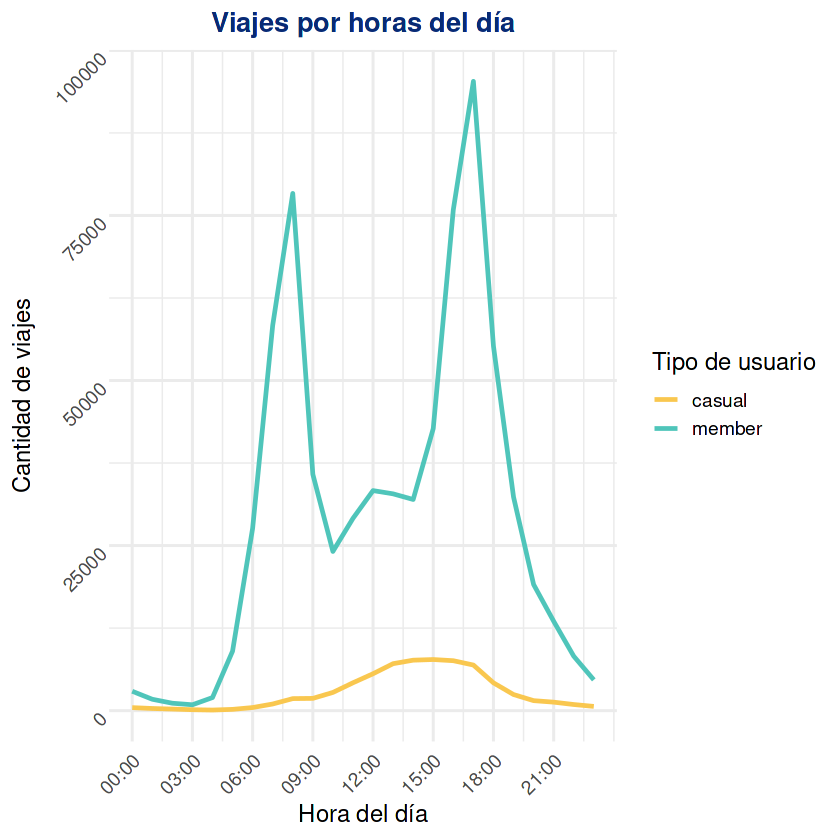

In [26]:
#Grafico 6:
ggplot(hourly_usage,aes(x = start_hour, y = num_trips, color = member_casual)) +
  geom_line(linewidth = 1) +
  labs(
    title = "Viajes por horas del día",
    x = "Hora del día",
    y = "Cantidad de viajes",
    color = "Tipo de usuario") +
  scale_x_continuous(
      breaks = seq(0, 23, by = 3),
      labels = sprintf("%02d:00",seq(0, 23, by = 3))) +
  scale_color_manual(values = c( "casual" = "#F9C74F", "member" = "#4FC5BA"))+
  theme_minimal(base_size = 14) + 
  theme(
      plot.title = element_text(color = "#082A75",size = 16,face = "bold", hjust = 0.5),
      axis.text.x = element_text(angle = 45, vjust = 1, hjust = 1),
      axis.text.y = element_text(angle = 45, vjust = 1, hjust = 1))


## Resumen de tareas realizadas
En el presente caso de estudio, se llevaron a cabo diversas tareas en RStudio relacionadas con la preparación y limpieza de datos. En primera instancia, se trabajó con la tabla correspondiente a 2019 de manera tal que se adaptara al formato de la tabla 2020 para posteriormente realizar su unificación. A partir de esta nueva tabla unificada, se hicieron modificaciones que incluyeron:

* Normalización de clasificación de usuarios
* Creación de nuevas variables:
  * Duración de los viajes,
  * Dia de la semana,
  * Hora de inicio,
  * Año 
* Análisis descriptivo y visualización de:
    * Distribución de usuarios por tipo,
    * Patrones de viaje por día de la semana y hora del día,
    * Duración de los viajes y posibles valores atípicos.    
* Reducción de la muestra contemplando solo valores considerados razonables.
* Ajuste de formatos de hora y fecha para garantizar consistencia en el análisis. 


## Recomendaciones 
Este análisis evidenció diferencias claras en los patrones de comportamiento de los usuarios, lo cual permite identificar oportunidades para incrementar la conversión hacia membresías anuales. En este sentido, la compañía debería implementar estrategias focalizadas en los fines de semana, en actividades vinculadas al turismo y alianzas comerciales.
Para ello se sugieren las siguientes acciones:

* Ofrecer pases anuales para fines de semana: Pases que incluyan únicamente viernes, sábados y domingos, con precios atractivos que resulten más convenientes que adquirir pases por tramo o por día.
* Desarrollar pases combinados con actividades turísticas: Paquetes que integren viajes en bicicleta con experiencias demandadas por los turistas, acompañados de descuentos obtenidos a través de convenios con empresas del sector.
* Crear alianzas con empresas de turismo: Acuerdos donde dichas empresas ofrezcan menores precios en sus servicios, mientras que Cyclistic a cambio otorgue descuentos para que los miembros de estas empresas puedan utilizar las unidades en su vida cotidiana. Esta alternativa introduce la posibilidad de atraer nuevos clientes con potencial de convertirse en miembros.


Sin dudas, la aplicación de iniciativas orientadas en este sentido contribuirá al aumento de la conversión de usuarios casuales a miembros, traduciéndose en mejoras significativas en la rentabilidad del programa y en un crecimiento sostenido de Cyclistic.


## Documentación del caso de estudio

El detalle de los requerimientos, el análisis de la información, los gráficos y las recomendaciones finales se encuentran en el siguiente PDF:


[Descripcion y requerimientos del caso de estudio](https://drive.google.com/file/d/19WI0l_t_uRrQfUxz3A-0tfyYhucxlTJZ/view?usp=drive_link)

[Resolucion caso de estudio](https://drive.google.com/file/d/1W4hfhNXLLIa2UJ35nhn2fY6zO_Shu34G/view?usp=drive_link)

